## **A Case Study on Hypothesis Testing**

Perform a hypothesis testing on the dataset to make decisions about if one hypothesis is true or false on the basis of different attributes. The idea behind this analysis is to check which attribute contributes to a particular hypothesis.

# Describing the dataset

The dataset includes data on policyholders with characteristics like policy tenure, age of the car, age of the owner, population density of the city, make and model of the car, power, engine type, etc., as well as the target variable indicating whether or not the policyholder files a claim in the upcoming six months.  <br>

**policy_id :** Unique identifier of the policyholder<br>
**policy_tenure :** Time period of the policy<br>
**age_of_car :** Normalised age of car in years<br>
**age_of_policyholder :** Normalised age of policyholder in years<br>
**area_cluster :** Area cluster of the policyholder<br>
**population_density :** Population density of the city(Policyholder City)<br>
**make :** Encoded Manufacturer/Company of the car<br>
**segment :**Segment of the car(A/ B1/B2/ C1/ C2)<br>
**model :** Encoded name of the car<br>
**fuel_type :** Type of fuel used by the car<br>
**max_torque :** Maximum torque generated by Car(Nm@rpm)<br>
**max_power :** Maximum power generated by Car(Nm@rpm)<br>
**engine_type :** Type of engine used in the car<br>
**airbags :** Number of airbags user in the car<br>
**is_esc :** Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not.<br>
**is_adjustable_steering :** Boolean flag indicating whether the steering wheel of the car is adjustable or not.<br>
**is_tpms :** Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not.<br>
**is_parking_sensors :** Boolean flag indicating whether parking sensors are present in the car or not.<br>
**is_parking_camera :** Boolean flag indicating whether the parking camera is present in the car or not.<br>
**rear_brakes_type :** Type of brakes used in the rear of the car<br>
**displacement :** Engine displacement of the car (cc)<br>
**cylinder :** Number of cylinders present in the engine of the car<br>
**transmission_type :** Transmission type of the car<br>
**gear_box :** Number of gears in the car<br>
**steering_type :** Type of the power steering present in the car<br>
**turning_radius :** The space a vehicle needs to make a certain turn (Meters)<br>
**length :** Length of the car (Millimetre)<br>
**width :** Width of the car (Millimetre)<br>
**height :** Height of the car (Millimetre)<br>
**gross_weight :** The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg)<br>
**is_front_fog_lights :** Boolean flag indicating whether front fog lights are available in the car or not.<br>
**is_rear_window_wiper :** Boolean flag indicating whether the rear window wiper is available in the car or not.<br>
**is_rear_window_washer :** Boolean flag indicating whether the rear window washer is available in the car or not.<br>
**is_rear_window_defogger :** Boolean flag indicating whether rear window defogger is available in the car or not.<br>
**is_brake_assist :** Boolean flag indicating whether the brake assistance feature is available in the car or not.<br>
**is_power_door_locks :** Boolean flag indicating whether a power door lock is available in the car or not.<br>
**is_central_locking :** Boolean flag indicating whether the central locking feature is available in the car or not.<br>
**is_power_steering :** Boolean flag indicating whether power steering is available in the car or not.<br>
**is_driver_seat_height_adjustable :** Boolean flag indicating whether the height of the driver seat is adjustable or not.<br>
**is_day_night_rear_view_mirror :** Boolean flag indicating whether day & night rearview mirror is present in the car or not.<br>
**is_ecw :** Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not.<br>
**is_speed_alert :** Boolean flag indicating whether the speed alert system is available in the car or not.<br>
**ncap_rating :** Safety rating given by NCAP (out of 5)<br>

<br>

**Target Variable**

**is_claim :** Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not.<br>







## Table of Content

1. **[Import Libraries](#a1)**
2. **[Data Preparation](#a2)**
    - 2.1 - **[Understand the Data](#a3)**
    - 2.2 - **[Correlation](#a4)**
    - 2.3 - **[Remove Insignificant Variables](#a5)**
    - 2.4 - **[Missing Value Analysis and Treatment](#a6)**
3. **[Types of Hypothesis Testing](#a11)** 
    - 3.1 - **[Parametric Testing](#a12)**
       - 3.1.1 - **[z-Test](#a13)**
       - 3.1.2 - **[Sample t-test](#a14)**
       - 3.1.3 - **[Anova Testing](#a15)**
    - 3.2 - **[Non-Parametric Testing](#a16)** 
       - 3.2.1 - **[Chi Square Testing](#a17)**



<a id="a1"></a>
# 1. Import Libraries


Here We are importing the libraries that are used in the code.<br>
scipy : It provides more utility functions for stats. <br>

In [5]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind

# python libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap



<a id="a2"></a>
# 2. Data Preparation

<br>

<a id="a3"></a>
## 2.1 Understand the Data

**Loading the the dataset**
 
We can load dataframe using `read_csv()` method from pandas.

In [7]:
df = pd.read_csv('Car Insurance Claim.csv')
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [8]:
df.shape

(58592, 44)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [10]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [11]:
# here we are splitting the maximum torque and speed into different columns
df[['max_torq','s1']] = df.max_torque.str.split("@",expand=True)
df[['max_pow','s2']] = df.max_power.str.split("@",expand=True)


In [12]:
# Removing the unit string from all rows
df["max_torq"]=df["max_torq"].str.replace("[Nm]","")
df["max_pow"]=df["max_pow"].str.replace("[bhp]","")
df["s1"]=df["s1"].str.replace("[rpm]","")
df["s2"]=df["s2"].str.replace("[rpm]","")

In [13]:
# Droping the columns
df.drop(['max_torque','max_power'],axis=1,inplace=True)

In [14]:
# Inspect non-numeric values
print(df['max_torq'].unique())

# Function to clean non-numeric characters
def clean_column(column):
    return pd.to_numeric(column.str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Apply the cleaning function
df['max_torq'] = clean_column(df['max_torq'])
df['max_pow'] = clean_column(df['max_pow'])
df['s1'] = clean_column(df['s1'])
df['s2'] = clean_column(df['s2'])

# Convert to float32
df[['max_torq', 'max_pow', 's1', 's2']] = df[['max_torq', 'max_pow', 's1', 's2']].astype(np.float32)

print(df.dtypes)  # Verify the datatype conversion


['60Nm' '113Nm' '91Nm' '250Nm' '200Nm' '82.1Nm' '85Nm' '170Nm']
policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box    

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  airbags                           58592 non-null  int64  
 12  is_e

<a id="a4"></a>
## 2.2 Correlation

Finding the correlation between different features

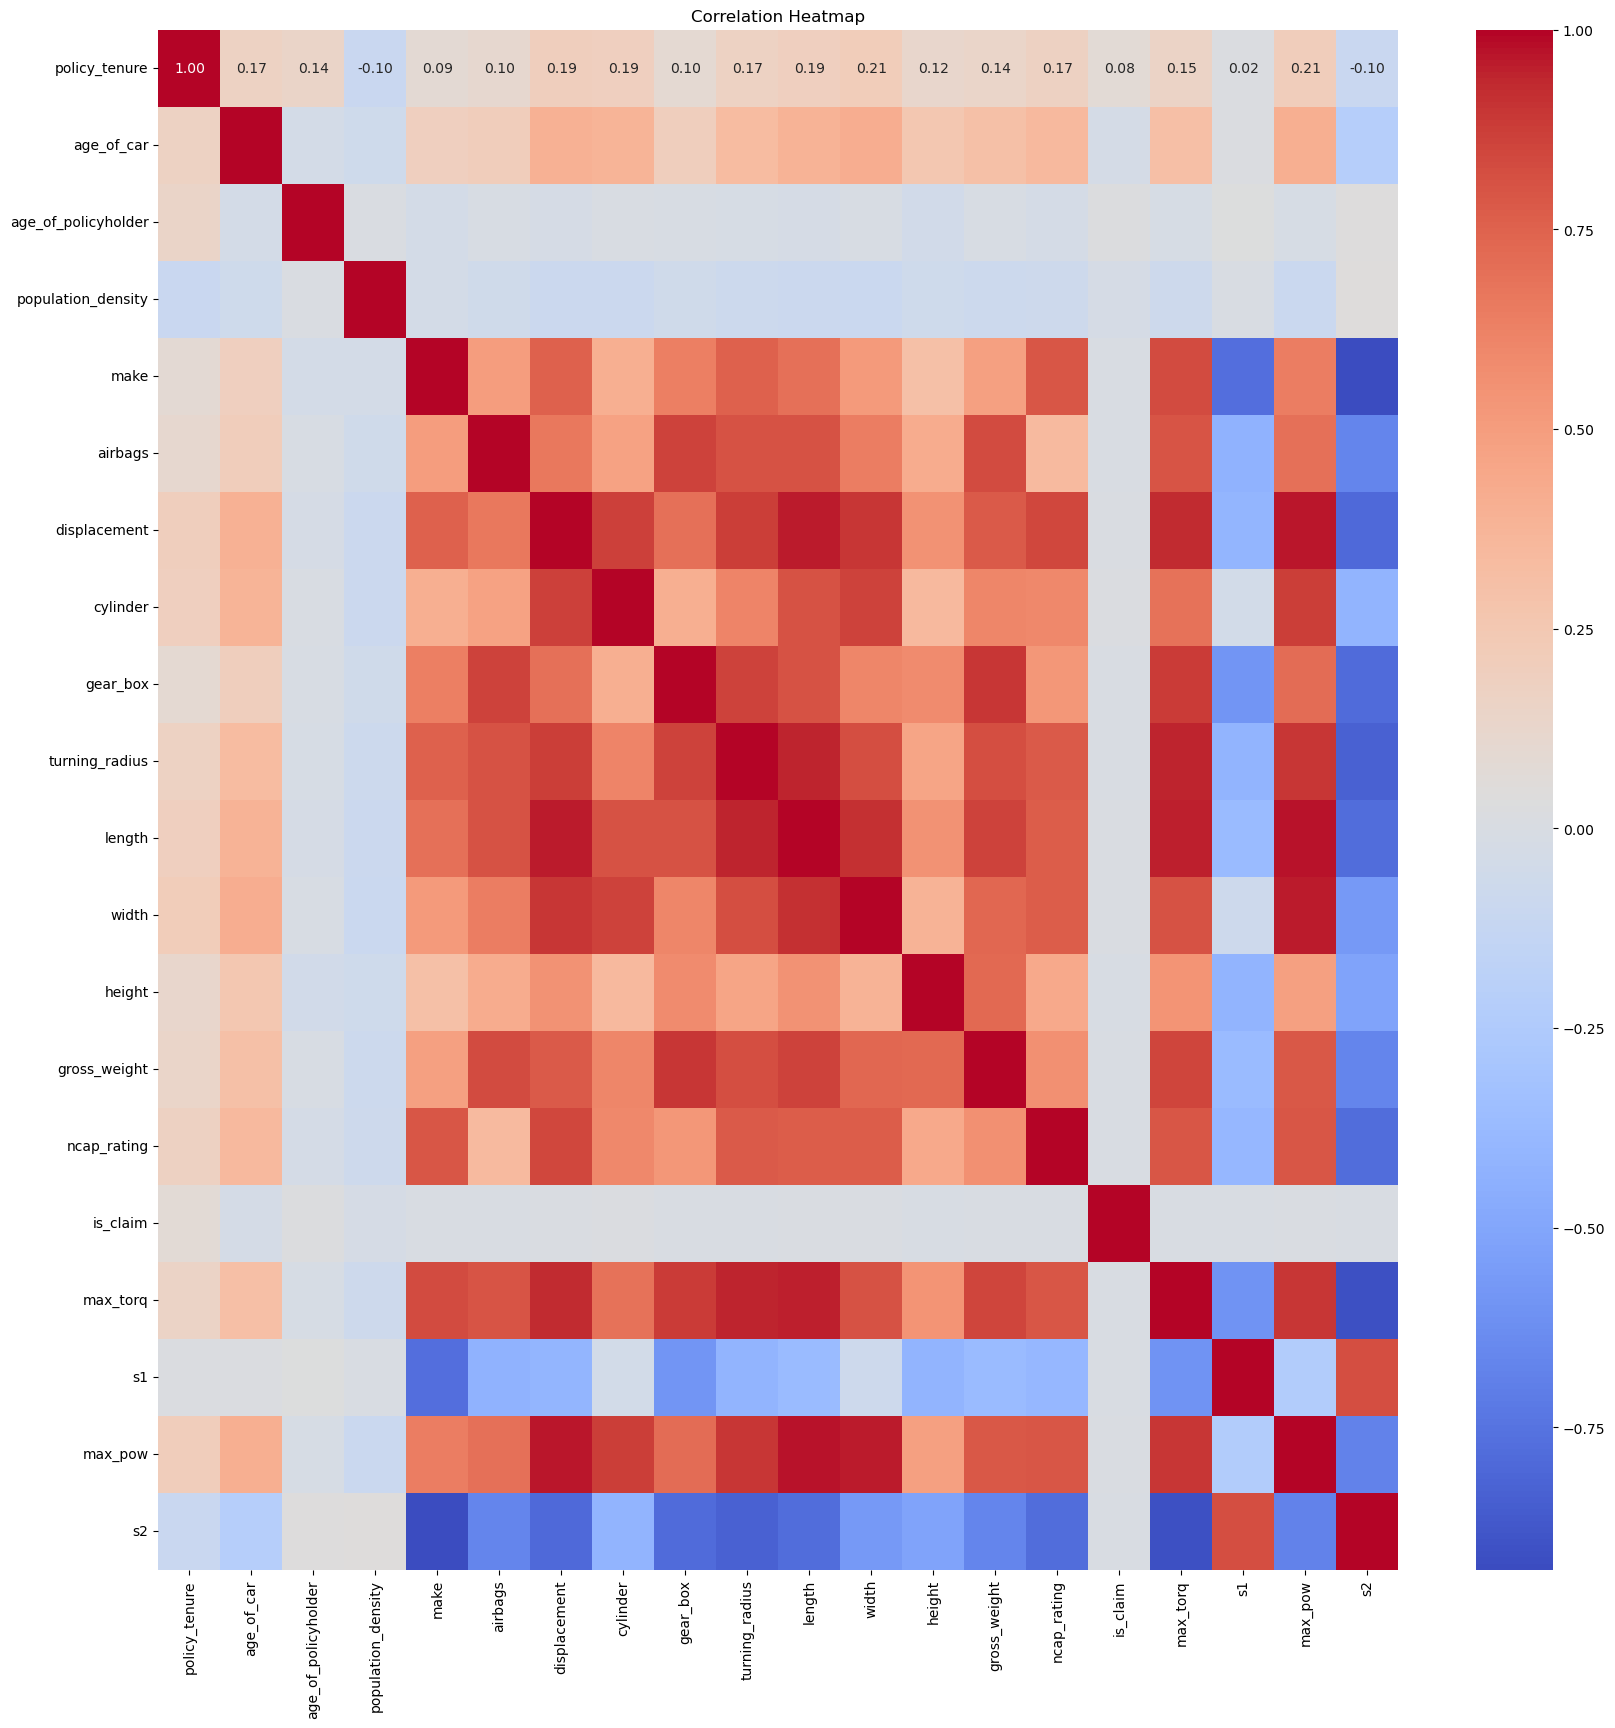

In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values if necessary (e.g., fill with 0 or drop rows)
numeric_df = numeric_df.fillna(0)  # Replace NaN with 0; adjust as needed

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



<a id="a5"></a>
## 2.3 Remove Insignificant Variables


In [19]:
df.drop(['age_of_policyholder'],axis=1,inplace=True)

<a id="a6"></a>
## 2.4 Missing Value Analysis and Treatment

We can check for the duplicate and null values by method called as `duplicated()` and `isna()`.



In [21]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight

In [22]:
df.duplicated().sum()

0

In [23]:
df.dropna(inplace=True,axis=0)

We can remove the null and duplicated values from the dataset because Datasets that contain duplicates may contaminate the statical analysis of the dataset and Entries with missing values will lead this analysis to misunderstand features, and outliers will undermine during analysis.

<a id="a11"></a>
## 4.1 Parametric Testing


### Z-test



**Question:**  The average wieight of a car in any group in this dataset is close to 1380.

**Step 1:** Define null and alternate hypothesis

* **h0(Null hypothesis)** : The average wieight of a car in any group in this dataset is close to 1380 <br>

* **h1(Alternative hypothesis) :** The average wieight of a car in any group in this dataset is not close to 1380 <br> 

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* z-test

**Step 4:** Calculate the test-statistics and p-value
* use ztest() method from stats library.

In [28]:
a = df["gross_weight"].mean()
print(a)

1385.2768125341343


In [29]:
from statsmodels.stats import weightstats as stests
ztest ,propability_value = stests.ztest(df['gross_weight'], value=1380)
print(float(propability_value))

if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis failed to be rejcected")
else:
    print("Null hyphothesis is failed to be rejected , Alternative hyphothesis rejected")

1.821535461057766e-09
Null hyphothesis rejected , Alternative hyphothesis failed to be rejcected


In [30]:
from statsmodels.stats import weightstats as stests
ztest ,propability_value = stests.ztest(df['gross_weight'], value=1385)
print(float(propability_value))

if propability_value<0.05:
    print("Null hyphothesis rejected , Alternative hyphothesis failed to be rejcected")
else:
    print("Null hyphothesis is failed to be rejected , Alternative hyphothesis rejected")

0.7524350790712429
Null hyphothesis is failed to be rejected , Alternative hyphothesis rejected


**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the two comparisons above that p-value is different on the basis of the question we have on the hypthesis.

p_value between 1380 and mean of `gross_weight` = 1.821535461057766e-09 < 0.05 (significance level) <br>
p_value between 1385 and mean of `gross_weight` = 0.75 > 0.05 (significance level) <br>


For the first case, we reject the null hypothesis, which means 1380 is not close to the average weight of the mean of `gross_wight` in the dataset. For the second p-value we can derive that 1385 is close the average mean of mean of the `gross_weight`. 

<a id="a12"></a>
### Sample t-test

This helps to find whether means of two independent groups are equal or significantly different from each other when population SD is not known.




<br>

**Questions :** Are there any difference in claiming insurance based on different types of fuel.

**Step 1:** Define null and alternative hypotheses.

* **h0(Null Hypothesis)**:  There is a difference in caliming insurnace on the basis of fule type of car(Petrol or Diesel).<br>
* **h1(Alternative Hypothesis)**:  There is no difference in caliming insurnace on the basis of fule type of car(Petrol or Diesel).<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* t-test

**Step 4:** Calculate the test-statistics and p-value
* use ttest_ind() method from stats library.

In [35]:
df.cylinder.value_counts()

cylinder
4    36735
3    21857
Name: count, dtype: int64

In [36]:
group1 = df[df['fuel_type']=='Petrol']
group2 = df[df['fuel_type']=='Diesel']

In [37]:
ttest_ind(group1['is_claim'],group2['is_claim'])

TtestResult(statistic=0.5994252295412839, pvalue=0.548892906323653, df=38260.0)

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

p_value = 0.55 > 0.05 (significance level)
We fail to reject null hypothesis.<br>

We conclude that, there is a difference for application in insurnace claim based on fule type of car(Petrol or Diesel).

<br>
<br>

**Question :** Does the insurance claim depends on the different types of steering of vehicles?

**Step 1:** Define null and alternative hypotheses.

* **h0(Null Hypothesis)**: Insurance claims are dependent on the different types of steering.<br>
* **h1(Alternative Hypothesis)**: Insurance claims are not dependent on the different types of steering.<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* t-test

**Step 4:** Calculate the test-statistics and p-value
* use ttest_ind() method from stats library.

In [41]:
# checking all the unique values of steering types
df['steering_type'].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

In [42]:
group1 = df[df['steering_type']=='Power']
group2 = df[df['steering_type']=='Electric']
group3 = df[df['steering_type']=='Manual']

In [43]:
ttest_ind(group1['is_claim'],group2['is_claim'])

TtestResult(statistic=-2.3377607929562316, pvalue=0.019403078480027838, df=57381.0)

In [44]:
ttest_ind(group1['is_claim'],group3['is_claim'])

TtestResult(statistic=0.23315767619250716, pvalue=0.8156403445655246, df=34709.0)

In [45]:
ttest_ind(group2['is_claim'],group3['is_claim'])

TtestResult(statistic=0.8836032511807208, pvalue=0.37691889044045523, df=25088.0)

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the three comparisons above that only one case as more p-value than the significance level, and the others are less significant. so,

p_value of group 1 and 2 = 0.01 < 0.05 (significance level) <br>
p_value of group 1 and 3 = 0.01 < 0.05 (significance level) <br>
p_value of group 2 and 3 = 1.0 > 0.05 (significance level) <br>


For the first two cases, we reject the null hypothesis.<br>
And for the final we fail to reject the null hypothesis.

We conclude that, for the first two cases **[power - electric] and [power - manual]** the claims were not independent while claiming the insurance.<br>
 However, the clams for the last **[electric-manual]** are independent while claiming the insurance. 

### Anova Testing



**Question:** Here we are trying to find whether the group means of different columns('make' and 'ncap_rating') are equal or not.
 
<br>

- **h0(Null Hypothesis)**: Two Groups have same mean (no variation in means of groups)
H0: μ1=μ2=…=μp

- **h1(Alternative Hypothesis)**: At least, one group mean is different from other groups
H1: All μ are not equal




In this method we will use python provided `f_oneway()` function from SciPy library using which we can conduct the One-Way ANOVA

In [50]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['make'], df['ncap_rating'])
print(fvalue, pvalue)

0.2585809498387168 0.6110976987839682


Here we can see the p_value > 0.05, so we fail to reject the null hypothesis. which is group means are same.

**Questions :** Checking whether the max torque and max power of a vehicle correlated or not. 

* **h0(Null hypothesis)** : Max troque and max power of a vehicle are related. <br>

* **h1(Alternative hypothesis) :** Max torque and max power of a vehicle are not related. <br> 

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* anova-test

**Step 4:** Calculate the test-statistics and p-value
* use stats.f_oneway() method from stats library.

In [53]:
import scipy.stats as stats

In [54]:
fvalue, pvalue = stats.f_oneway(df['max_torq'], df['max_torq'])
print(pvalue)

1.0


In [55]:
fvalue, pvalue = stats.f_oneway(df['max_torq'], df['max_pow'])
print(pvalue)

0.0


**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the two comparisons above that p-value is 1 when comparing with same column (max_torq), and p-value between `max_towq` and `max_pow` is 0.0

p_value between `max_torq` and `max_torq` = 1.0 > 0.05 (significance level) <br>
p_value between `max_torq` and `max_pow` = 0.0 < 0.05 (significance level) <br>


For the first two cases, we fail to reject the null hypothesis, which means these groups have some correlation between them. And for the second comparison we reject the null hypothesis, which means there exists a difference bwtween max_torq and max_pow.

**Question:**  Does the insurance claim depends on the different types of segments of vehicles? <br> 

**Step 1:** Define null and alternative hypotheses.

* **h0(Null Hypothesis)**: Insurance claims are dependent on the different vehicle segments. <br> 

* **h1(Alternative Hypothesis)**: Insurance claims are not dependent on the different vehicle segments. <br> 

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* z-test

**Step 4:** Calculate the test-statistics and p-value
* use ztest() method from stats library.

In [58]:
# talking a look at how many different segments are present 
df['segment'].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [59]:
# counting the number of elements in each segments
df.segment.value_counts()

segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64

In [60]:
group1 = df[df['segment']=='A']
group2 = df[df['segment']=='C1']
group3 = df[df['segment']=='C2']
group4 = df[df['segment']=='B1']
group5 = df[df['segment']=='B2']
group6 = df[df['segment']=='Utility']

In [61]:
fvalue, pvalue = stats.f_oneway(group1['is_claim'],group2['is_claim'])
pvalue

0.39985719818857357

In [62]:
fvalue, pvalue = stats.f_oneway(group1['is_claim'],group2['is_claim'], group3['is_claim'], group4['is_claim'])
pvalue

0.36440285716544085

In [63]:
fvalue, pvalue = stats.f_oneway(group1['is_claim'],group2['is_claim'], group3['is_claim'], group4['is_claim'], group5['is_claim'], group6['is_claim'])
pvalue

0.027383248953183385

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

We can see from the three comparisons above that p-value drops as we tend to add different groups in the equation. After we take the all the groups into consideration the p-value is lower than the significance level.

p_value between group 1 and 2 = 0.39 > 0.05 (significance level) <br>
p_value between group 1, 2, 3, 4 = 0.36 > 0.05 (significance level) <br>
p_value between group 1, 2, 3, 4, 5, 6 = 0.02 < 0.05 (significance level) <br>


For the first two cases, we fail to reject the null hypothesis, which means these groups have some correlation between them.<br>
And for the final we reject the null hypothesis, which means there exists a difference in claiming insurance among six different groups.

<a id="a11"></a>
## 4.2 Non-Parametric Testing


<a id="a11"></a>
###  Chi square Testing

Chi square test is one of the most important tests if your data is categorical in nature. These categorical values can be either nominal or ordinal, and have only a few specific values. Hence can not have a normal distribution.
  

**Question :** Checking whether the length and width are associated with each other or not for claiming the car insurance

**Step 1:** Define null and alternative hypotheses.<br>

**Parth**

* **h0(Null Hypothesis)**: Insurance claims are dependent on the length and width of the car.<br>
* **h1(Alternative Hypothesis)**: Insurance claims are not dependent on the length and width of the car.<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* Chi square test

**Step 4:** Calculate the test-statistics and p-value
* use chi2_contigency() method from stats library.

In [69]:
new = pd.pivot_table(data = df,values='is_claim', index='length', columns='width', aggfunc='count').fillna(0)

In [70]:
stats.chi2_contingency(new)

Chi2ContingencyResult(statistic=446104.824219078, pvalue=0.0, dof=72, expected_freq=array([[3.08440265e+02, 3.81353605e+03, 6.05400123e+02, 1.06461640e+03,
        5.39324003e+02, 3.79006499e+03, 7.50053250e+02, 4.07682004e+02,
        3.57627430e+03, 9.26086155e+01],
       [8.61065845e+01, 1.06461640e+03, 1.69008209e+02, 2.97206598e+02,
        1.50561886e+02, 1.05806404e+03, 2.09390702e+02, 1.13811681e+02,
        9.98380564e+02, 2.58533418e+01],
       [2.49467675e+01, 3.08440265e+02, 4.89649952e+01, 8.61065845e+01,
        4.36207332e+01, 3.06541917e+02, 6.06645958e+01, 3.29734776e+01,
        2.89250444e+02, 7.49022051e+00],
       [4.89649952e+01, 6.05400123e+02, 9.61074720e+01, 1.69008209e+02,
        8.56178659e+01, 6.01674085e+02, 1.19071204e+02, 6.47196546e+01,
        5.67734742e+02, 1.47016487e+01],
       [2.84256963e+02, 3.51453523e+03, 5.57933643e+02, 9.81145003e+02,
        4.97038230e+02, 3.49290442e+03, 6.91245221e+02, 3.75717641e+02,
        3.29587602e+03, 8.534762

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

p_value = 0.0 < 0.05 (significance level)
We reject null hypothesis.<br>

We conclude that, lenth are width are not independent, they are **associated** with each other.

**Question:** Checking if the airbag is connected to the speed alert system, which is why car insurance claims are made

**Step 1:** Define null and alternative hypotheses.

 **Parth**

* **h0(Null Hypothesis)**: airbags and speed system alerts are independently associated with insurance claims.<br>
* **h1(Alternative Hypothesis)**: airbags and speed system alerts are not independently associated with insurance claims.<br>

**Step 2:** Decide the significance level <br>
* α = 0.05

**Step 3:** Identify Test
* Chi square test

**Step 4:** Calculate the test-statistics and p-value
* use chi2_contigency() method from stats library.

In [74]:
sp = pd.pivot_table(data = df,values='is_claim', index='airbags', columns='is_speed_alert', aggfunc='count').fillna(0)

In [75]:
stats.chi2_contingency(sp)

Chi2ContingencyResult(statistic=164.14921247250035, pvalue=2.2669994106029363e-36, dof=2, expected_freq=array([[7.49022051e+00, 1.20150978e+03],
       [2.50448440e+02, 4.01745516e+04],
       [1.05061339e+02, 1.68529387e+04]]))

**Step 5:** Decide to reject or fail to reject null hypothesis.<br>

p_value = 2.2 > 0.05 (significance level)<br>

We fail to reject the null hypothesis.<br>

We conclude that airbags and speed system alerts are independently associated with insurance claims.